Regressione lineare su polinomio con determinazione della distribuzione predittiva

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['lines.linewidth'] = 2

# definisce un vettore di colori
colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

$d$ funzioni base gaussiane, con medie intervallate in modo costante nel dominio considerato e varianza unitaria

In [3]:
def vphi(x, d, dom):
    l = np.linspace(domain[0], domain[1], d+1)
    mus = [(l[i]+l[i+1])/2.0 for i in range(len(l)-1)]
    return np.array([gaussian_basis(x, mus[i], 1) for i in range(d)]).T

Funzione base gaussiana

In [4]:
def gaussian_basis(x, m, s):
    return np.exp(-((x-m)**2)/(2*s**2))

Genera la matrice delle features e il vettore target

In [11]:
# dominio della feature
domain=(0,2*np.pi)
# numero di elementi da generare
n=10
# array delle feature generato uniformemente nel dominio
X=np.random.uniform(domain[0], domain[1], n)

# genera il vettore target mediante la funzione f e l'aggiunta di rumore gaussiano
# funzione 
def f(x):
    return np.sin(x)
# sd del rumore
noise = .05

#genera target
t=np.array([(f(v)+np.random.normal(0,noise,1))[0] for v in X]).reshape(-1,1)

# numero di funzioni base
d=8
# genera immagine di X per la regressione
Phi = vphi(X,d, domain)

Iperparametri

In [12]:
# iperparametro per il prior
alfa=.2
# parametri del prior
mu=np.zeros(d+1)
sigma=np.eye(d+1)*alfa

# parametro per la verosimiglianza
beta=9

Distribuzione predittiva dato un valore $v$

In [13]:
# media della distribuzione predittiva
def m_pred(v):
    return m.T.dot(vphi(v,d,domain))
# varianza della distribuzione predittiva    
def var_pred(v):
    v1=vphi(v,d,domain)
    return 1.0/beta+v1.dot(s.dot(v1.T))

In [14]:
# numero elementi considerati per il training
l=2
# estrazione del training set
X_t, t_t = Phi[:l,:], t[:l]

# derivazione di media e matrice di covarianza a posteriori
s = np.linalg.inv(np.eye(d)+beta*np.dot(X_t.T,X_t))
m=beta*s.dot(X_t.T.dot(t_t))

Plot della distribuzione predittiva

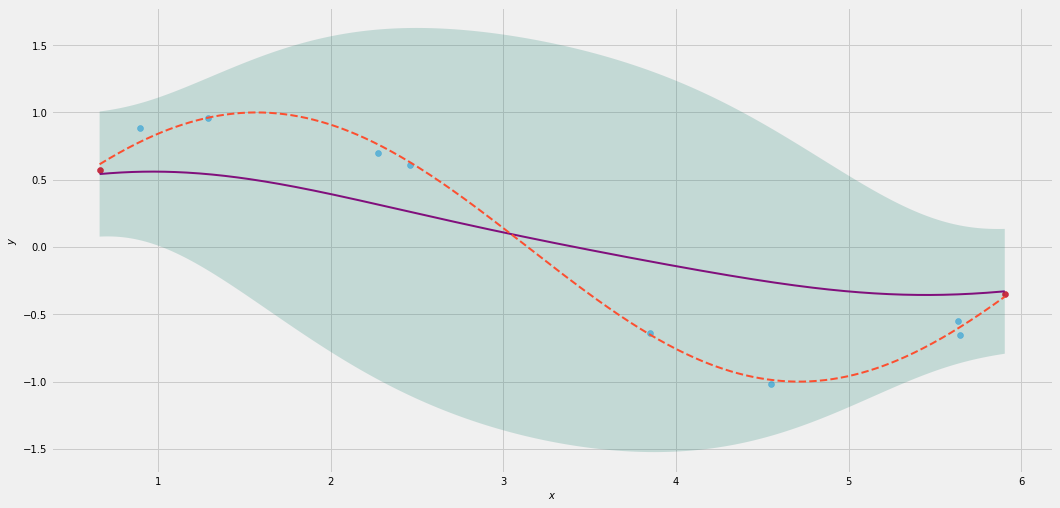

In [15]:
# insieme dei valori considerati per il plot
xx=np.linspace(min(X),max(X),500)
# loro immagini per il calcolo della regressione
phix=vphi(xx,d,domain)

# calcolo di media e varianza della distribuzione predittiva per tutti i valori
mx = np.vectorize(m_pred)(xx)
sx= np.vectorize(var_pred)(xx)

# visualizzazione
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
# plot della media
ax.plot(xx,mx,'-', c=colors[5], alpha=1)
# riempimento della regione a distanza minore di una sd dalla media
ax.fill_between(xx, mx-np.sqrt(sx), mx+np.sqrt(sx), facecolor=colors[6], alpha=.2)
# elementi dell'insieme
ax.scatter(X[l:], t[l:], c=colors[0], marker='o', alpha=.5)
ax.scatter(X[:l], t[:l], c=colors[7], marker='o', alpha=.8)
# plot funzione originale
ax.plot(xx,f(xx),'--',c=colors[1],alpha=1)
plt.xlabel(u'$x$', fontsize=10)
plt.ylabel(u'$y$', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
